In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# variant 27
# u" + 2 th(x) u' + 1 / ch^4 (x) u = -4 thx - 2x / ch^4 (x)
# u(0) = 0, u'(0) = -1
# u0(x) = sin(th(x)) - 2x

In [99]:
# parameters that can be changed

h = 0.05
h_check = 0.1

In [100]:
# u'(x) = v(x)
# v'(x) = -2 th(x) v - 1 / ch^4 (x) u - 4 thx - 2x / ch^4 (x)

In [101]:
# function declaration

a = 0
b = 1
u_0 = 0
v_0 = -1
x, v, u = sp.symbols("x v u")
fu = v
fv = -2 * sp.tanh(x) * v - u / pow(sp.cosh(x), 4) - 4 * sp.tanh(x) - 2 * x / pow(sp.cosh(x), 4)
u0 = sp.sin(sp.tanh(x)) - 2 * x
fv

-u/cosh(x)**4 - 2*v*tanh(x) - 2*x/cosh(x)**4 - 4*tanh(x)

In [102]:
# prepearing coords

n = round((b - a) / h) + 1
xcoords = [ a + i * h for i in range(n)]
u0coords = [u0.subs(x, xcoords[i]) for i in range(n)]
#xcoords

In [6]:
# euler method
# y_i+1 = y_i + h * f(x_i, y_i)

def euler_method(xcoords):
    ucoords = [u_0]
    vcoords = [v_0]
    for i in range(len(xcoords) - 1):
        prev_u = ucoords[len(ucoords) - 1]
        prev_v = vcoords[len(vcoords) - 1]
        prev_x = xcoords[i]
        current_u = prev_u + h * fu.subs(v, prev_v)
        current_v = prev_v + h * fv.subs([(x, prev_x), (v, prev_v), (u, prev_u)])
        ucoords.append(current_u)
        vcoords.append(current_v)
    plt.plot(xcoords, ucoords)
    plt.plot(xcoords, u0coords)
    plt.legend(['u_counted', 'u0'])
    return ucoords

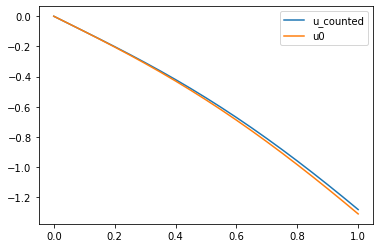

In [7]:
eulercoords = euler_method(xcoords)

In [8]:
# runge kutta method
# y_i+1 = y_i + delta_y_i, delta_y_i = h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
# k1 = f(x_i, y_i)
# k2 = f(x_i + h/2, y_i + h * k1 / 2)
# k3 = f(x_i + h/2, y_i + h * k2 / 2)
# k4 = f(x_i + h, y_i + h * k3)

def runge_kutta_method(xcoords, h, u0):
    ucoords = [u_0]
    vcoords = [v_0]
    for i in range(len(xcoords) - 1):
        prev_x = xcoords[i]
        prev_u = ucoords[len(ucoords) - 1]
        prev_v = vcoords[len(vcoords) - 1]
        
        k1_u = fu.subs(v, prev_v)
        k1_v = fv.subs([(x, prev_x), (v, prev_v), (u, prev_u)])
        
        k2_u = fu.subs(v, prev_v + h * k1_v / 2)
        k2_v = fv.subs([(x, prev_x + h / 2), (v, prev_v + h * k1_v / 2), (u, prev_u + h * k1_u / 2)])
        
        k3_u = fu.subs(v, prev_v + h * k2_v / 2)
        k3_v = fv.subs([(x, prev_x + h / 2), (v, prev_v + h * k2_v / 2), (u, prev_u + h * k2_u / 2)])
        
        k4_u = fu.subs(v, prev_v + h * k3_v)
        k4_v = fv.subs([(x, prev_x + h), (v, prev_v + h * k3_v), (u, prev_u + h * k3_u)])
        
        current_u = prev_u + h / 6 * (k1_u + 2 * k2_u + 2 * k3_u + k4_u)
        current_v = prev_v + h / 6 * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        ucoords.append(current_u)
        vcoords.append(current_v)
    plt.plot(xcoords, ucoords)
    plt.plot(xcoords, u0)
    return ucoords

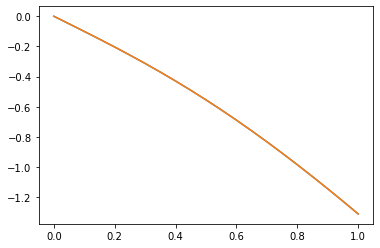

In [9]:
runge_kuttacoords = runge_kutta_method(xcoords, h, u0coords)

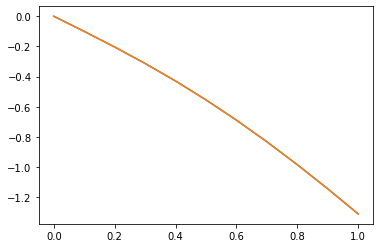

In [10]:
# prepearing data for checking

n_check = round((b - a) / h_check) + 1
xcoords_check = [ a + i * h_check for i in range(n_check)]
u0coords_check = [ u0.subs(x, xcoords_check[i]) for i in range(n_check)]
#xcoords_check
runge_kuttacoords_check = runge_kutta_method(xcoords_check, h_check, u0coords_check)

In [11]:
# checking 4-th
# (y_i_h - y_i_h/2) / (2^p - 1) = d(y_i_h/2), p - ?

d_h = max([abs(runge_kuttacoords[i] - u0coords[i]) for i in range(len(u0coords))])    # d(y_i_h/2)
d_2h = max([abs(runge_kuttacoords[2 * i] - runge_kuttacoords_check[i]) for i in range(len(runge_kuttacoords_check))])  #y_i_h - y_i_h/2
p = sp.log(d_2h / d_h + 1) / sp.log(2).n()     # ln -> log2
p

4.02530074049228

In [12]:
# runge kutta method for deviation
# (y_i_h - y_i_h/2) / (2^p - 1) = d(y_i_h/2), p = 4

d_2h = max([abs(runge_kuttacoords[2 * i] - runge_kuttacoords_check[i]) for i in range(len(runge_kuttacoords_check))])  #y_i_h - y_i_h/2
deviation = d_2h / (16 - 1) # d(y_i_h/2)
deviation

1.17068779988590e-7

In [13]:
d_h = max([abs(runge_kuttacoords[i] - u0coords[i]) for i in range(len(u0coords))])    # d(y_i_h/2)
d_h

1.14900462366840e-7

In [92]:
# adams method 3
# y_i+1 = y_i + delta_y_i, delta_y_i = h / 12 * (23 * k1 - 16 * k2 + 5 * k3)
# k1 = f(x_i, y_i)
# k2 = f(x_i-1, y_i-1)
# k3 = f(x_i-2, y_i-2)
# ( x_i+1 = x_i + h )
# y_i+1 = y_i + delta_y_i, delta_y_i = h * k1
# y_i+1 = y_i + delta_y_i, delta_y_i = h / 2 * (3 * k1 - k2)

def adams_method(xcoords):
    ucoords = [u_0]
    vcoords = [v_0]
    for i in range(len(xcoords) - 1):
        prev_x = xcoords[i]
        prev_u = ucoords[len(ucoords) - 1]
        prev_v = vcoords[len(vcoords) - 1]
        
        k1_u = fu.subs(v, vcoords[len(vcoords) - 1])
        k1_v = fv.subs([(x, xcoords[i]), (v, vcoords[len(vcoords) - 1]), (u, ucoords[len(ucoords) - 1])])
        
        if i == 0:
            current_u = prev_u + h * k1_u
            current_v = prev_v + h * k1_v
            ucoords.append(current_u)
            vcoords.append(current_v)
            continue
        
        k2_u = fu.subs(v, vcoords[len(vcoords) - 2])
        k2_v = fv.subs([(x, xcoords[i - 1]), (v, vcoords[len(vcoords) - 2]), (u, ucoords[len(ucoords) - 2])])
        
        if i == 1:
            current_u = prev_u + h / 2 * (3 * k1_u - k2_u)
            current_v = prev_v + h / 2 * (3 * k1_v - k2_v)
            ucoords.append(current_u)
            vcoords.append(current_v)
            continue
            
            
        k3_u = fu.subs(v, vcoords[len(vcoords) - 3])
        k3_v = fv.subs([(x, xcoords[i - 2]), (v, vcoords[len(vcoords) - 3]), (u, ucoords[len(ucoords) - 3])])
            
        current_u = prev_u + h / 12 * (23 * k1_u - 16 * k2_u + 5 * k3_u)
        current_v = prev_v + h / 12 * (23 * k1_v - 16 * k2_v + 5 * k3_v)
        ucoords.append(current_u)
        vcoords.append(current_v)
    plt.plot(xcoords, ucoords)
    plt.plot(xcoords, u0coords)
    return ucoords

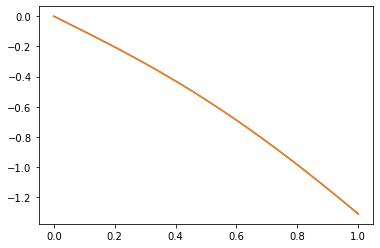

In [98]:
adamscoords = adams_method(xcoords)

In [104]:
# adams_method for deviation

def adams_method_deviation(xcoords, h):
    ucoords = [u_0]
    vcoords = [v_0]
    for i in range(len(xcoords) - 1):
        prev_x = xcoords[i]
        prev_u = ucoords[len(ucoords) - 1]
        prev_v = vcoords[len(vcoords) - 1]
        
        k1_u = fu.subs(v, vcoords[len(vcoords) - 1])
        k1_v = fv.subs([(x, xcoords[i]), (v, vcoords[len(vcoords) - 1]), (u, ucoords[len(ucoords) - 1])])
        
        if i == 0:
            current_u = prev_u + h * k1_u
            current_v = prev_v + h * k1_v
            ucoords.append(current_u)
            vcoords.append(current_v)
            continue
        
        k2_u = fu.subs(v, vcoords[len(vcoords) - 2])
        k2_v = fv.subs([(x, xcoords[i - 1]), (v, vcoords[len(vcoords) - 2]), (u, ucoords[len(ucoords) - 2])])
        
        if i == 1:
            current_u = prev_u + h / 2 * (3 * k1_u - k2_u)
            current_v = prev_v + h / 2 * (3 * k1_v - k2_v)
            ucoords.append(current_u)
            vcoords.append(current_v)
            continue
            
            
        k3_u = fu.subs(v, vcoords[len(vcoords) - 3])
        k3_v = fv.subs([(x, xcoords[i - 2]), (v, vcoords[len(vcoords) - 3]), (u, ucoords[len(ucoords) - 3])])
            
        current_u = prev_u + h / 12 * (23 * k1_u - 16 * k2_u + 5 * k3_u)
        current_v = prev_v + h / 12 * (23 * k1_v - 16 * k2_v + 5 * k3_v)
        ucoords.append(current_u)
        vcoords.append(current_v)
    return ucoords

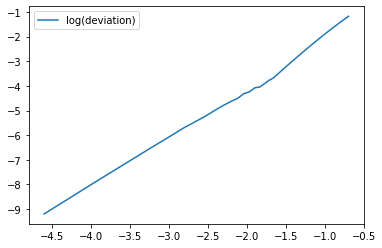

In [108]:
# plot log(deviation) ( log(h) )

start = 0.01
end = 0.5
step = 0.01

h_s = [ start + i * step for i in range(round((end - start) / step) + 1) ]
deviation_s = []

for h_i in h_s:
    n_i = round((b - a) / h_i) + 1
    xcoords_i = [ a + i * h_i for i in range(n_i)]
    u0coords_i = [u0.subs(x, xcoords_i[i]) for i in range(n_i)]
    ucoords_i = adams_method_deviation(xcoords_i, h_i)
    deviation_i = max([abs(ucoords_i[i] - u0coords_i[i]) for i in range(n_i)])
    deviation_s.append(deviation_i)

plt.plot(list(map(sp.log, h_s)), list(map(sp.log, deviation_s)))
plt.legend(['log(deviation)'])